In [59]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import os

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image

In [30]:
def open_images():
    """returns the images and labels of the images in the folder

    Returns:
        np array: images_arr
        np array: labels_arr
    """
    images_arr = []
    labels_arr = []
    counter = 0
    for class_name in os.listdir('./dinos_processed'):
        for image in os.listdir(f'./dinos_processed/{class_name}'):
            img = Image.open(f'./dinos_processed/{class_name}/{image}')
            img_gray = img.convert('L')  # convert image to grayscale
            images_arr.append(np.array(img_gray))
            labels_arr.append(class_name.lower())

        counter += 1

        if counter == 2:
            break # only two classes for now

    return np.array(images_arr), np.array(labels_arr)
    

x, y = open_images()
x.shape


(200, 100, 100)

Son 100 imagenes, de 100x100, en los 3 canales RGB.

In [31]:
np.unique(y)

array(['parasaurolophus', 'spinosaurus'], dtype='<U15')

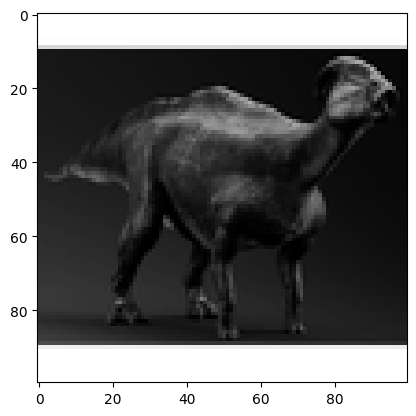

In [25]:
plt.imshow(x[0], cmap='gray')

In [36]:
# We split the data into training and testing
train_images, test_images, train_labels, test_labels = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [37]:
le = LabelEncoder()
train_labels = le.fit_transform(train_labels)
test_labels = le.transform(test_labels)

In [62]:
num_classes = len(np.unique(y))
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)
train_labels

array([[[[1., 0.],
         [0., 1.]],

        [[0., 1.],
         [1., 0.]]],


       [[[0., 1.],
         [1., 0.]],

        [[1., 0.],
         [0., 1.]]],


       [[[1., 0.],
         [0., 1.]],

        [[0., 1.],
         [1., 0.]]],


       ...,


       [[[1., 0.],
         [0., 1.]],

        [[0., 1.],
         [1., 0.]]],


       [[[0., 1.],
         [1., 0.]],

        [[1., 0.],
         [0., 1.]]],


       [[[0., 1.],
         [1., 0.]],

        [[1., 0.],
         [0., 1.]]]])

In [53]:
train_images[0].shape

(100, 100)

## Modelo de Datos

In [57]:
base_filters = 32
w_regularizer = 1e-4

In [63]:
model = tf.keras.Sequential()

# First layer
model.add(Conv2D(filters=base_filters, kernel_size=(3,3), kernel_regularizer=regularizers.l2(w_regularizer), padding='same', activation='relu', input_shape=(100,100,1)))
model.add(Activation('relu'))

# Second layer
model.add(Conv2D(filters=2*base_filters, kernel_size=(3,3), kernel_regularizer=regularizers.l2(w_regularizer), padding='same', activation='relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Third layer
model.add(Conv2D(filters=2*base_filters, kernel_size=(3,3), kernel_regularizer=regularizers.l2(w_regularizer), padding='same', activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Fourth layer
model.add(Conv2D(filters=2*base_filters, kernel_size=(3,3), kernel_regularizer=regularizers.l2(w_regularizer), padding='same', activation='relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Fifth layer
model.add(Conv2D(filters=4*base_filters, kernel_size=(3,3), kernel_regularizer=regularizers.l2(w_regularizer), padding='same', activation='relu'))
model.add(Activation('relu'))

# Sixth layer
model.add(Conv2D(filters=4*base_filters, kernel_size=(3,3), kernel_regularizer=regularizers.l2(w_regularizer), padding='same', activation='relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Flatten the output
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 100, 100, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 50, 50, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 50, 50, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 25, 25, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        36,866 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 350,978 (1.34 MB)

 Trainable params: 350,978 (1.34 MB)

 Non-trainable params: 0 (0.00 B)